In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_org= pd.read_csv('landslide_data2_original.csv')
df_org

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,24.29851,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,24.06923,87.64615,254.25
...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,-1.585004,2.894999,2.732073,16.65926,58.69630,73577.25
941,22-11-2018,t9,-1.585004,2.894999,2.732073,15.52482,63.16312,65301.75
942,23-11-2018,t9,-1.585004,2.894999,2.732073,15.81560,59.21277,73534.50
943,24-11-2018,t9,-1.585004,2.894999,2.732073,16.58571,54.63571,72283.50


In [5]:
df_miss = pd.read_csv('landslide_data2_miss.csv')
df_miss

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.64615,254.25
...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,NaN,NaN,NaN,NaN,NaN
941,22-11-2018,t9,-1.585004,2.894999,2.732073,15.52482,63.16312,65301.75
942,23-11-2018,t9,-1.585004,2.894999,2.732073,15.81560,59.21277,73534.50
943,24-11-2018,t9,-1.585004,2.894999,2.732073,16.58571,54.63571,72283.50


In [8]:
temperature_valid_indices = df_miss['temperature'].dropna().index[:2]
df_miss.loc[temperature_valid_indices, 'temperature'] = "na"

 
df_miss.replace("na", pd.NA, inplace=True)
 
missing_values_per_column = df_miss.isnull().sum()
total_missing_values = df_miss.isnull().sum().sum()

# Display the updated missing values
print("Updated number of missing values in each attribute:")
print(missing_values_per_column)

print("\nUpdated total number of missing values in the file:", total_missing_values)

# Save the modified file for reference
df_miss.to_csv('landslide_data2_miss-updated.csv', index=False)
print("\nModified dataset saved as 'landslide_data2_miss-updated.csv'.")

Updated number of missing values in each attribute:
dates           0
stationid      22
dispx          51
dispy          51
dispz          53
temperature    47
humidity       48
rain           16
dtype: int64

Updated total number of missing values in the file: 288

Modified dataset saved as 'landslide_data2_miss-updated.csv'.


/tmp/ipykernel_8750/2734618037.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_miss.loc[temperature_valid_indices, 'temperature'] = "na"


In [11]:
df_miss.isnull().sum()

dates           0
stationid      22
dispx          51
dispy          51
dispz          53
temperature    47
humidity       48
rain           16
dtype: int64

In [13]:
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dates        945 non-null    object 
 1   stationid    923 non-null    object 
 2   dispx        894 non-null    float64
 3   dispy        894 non-null    float64
 4   dispz        892 non-null    float64
 5   temperature  898 non-null    object 
 6   humidity     897 non-null    float64
 7   rain         929 non-null    float64
dtypes: float64(5), object(3)
memory usage: 59.2+ KB


In [15]:
df_miss.loc[df_miss['dispy'].first_valid_index(), 'dispy'] = None
df_miss.loc[df_miss['dispy'].last_valid_index(), 'dispy'] = None


temperature_valid_indices = df_miss['temperature'].dropna().index[:2]
df_miss.loc[temperature_valid_indices, 'temperature'] = "N/A"


df_miss.replace("N/A", pd.NA, inplace=True)


missing_values_per_column = df_miss.isnull().sum()
total_missing_values = df_miss.isnull().sum().sum()


print("Updated number of missing values in each attribute:")
print(missing_values_per_column)

print("\nUpdated total number of missing values in the file:", total_missing_values)


df_miss.to_csv('landslide_data2_miss-COPY.csv', index=False)
print("\nModified dataset saved as 'landslide_data2_miss-COPY.csv'.")

Updated number of missing values in each attribute:
dates           0
stationid      22
dispx          51
dispy          53
dispz          53
temperature    49
humidity       48
rain           16
dtype: int64

Updated total number of missing values in the file: 292

Modified dataset saved as 'landslide_data2_miss-COPY.csv'.


Number of tuples with specific missing values:
0    793
1     91
2     26
3     10
4     10
5     11
6      4
Name: count, dtype: int64


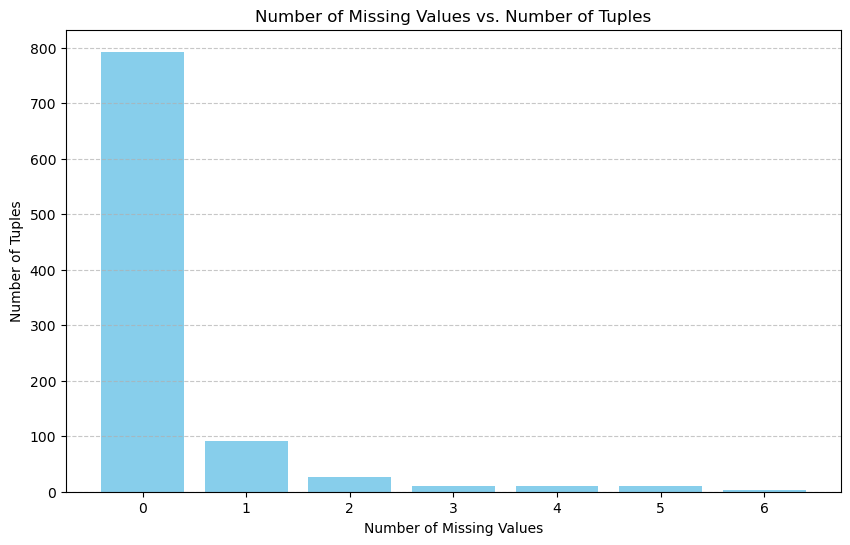

Number of tuples with >=50% of attributes missing: 25
After dropping tuples with >=50% missing values, the dataset has 920 rows.
After dropping tuples with missing 'quality' attribute, the dataset has 916 rows.
Cleaned datasets saved as 'landslide_data2_cleaned.csv' and 'landslide_data2_target_cleaned.csv'.


In [17]:

missing_counts = df_miss.isnull().sum(axis=1)


missing_value_distribution = missing_counts.value_counts().sort_index()

print("Number of tuples with specific missing values:")
print(missing_value_distribution)


plt.figure(figsize=(10, 6))
plt.bar(missing_value_distribution.index, missing_value_distribution.values, color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Tuples')
plt.title('Number of Missing Values vs. Number of Tuples')
plt.xticks(range(missing_value_distribution.index.min(), missing_value_distribution.index.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


threshold = len(df_miss.columns) / 2

tuples_with_high_missing = (missing_counts >= threshold).sum()
print(f"Number of tuples with >=50% of attributes missing: {tuples_with_high_missing}")


df_cleaned = df_miss[missing_counts < threshold]
print(f"After dropping tuples with >=50% missing values, the dataset has {len(df_cleaned)} rows.")


df_target_cleaned = df_cleaned.dropna(subset=['rain'])
print(f"After dropping tuples with missing 'quality' attribute, the dataset has {len(df_target_cleaned)} rows.")


df_cleaned.to_csv('landslide_data2_cleaned.csv', index=False)
df_target_cleaned.to_csv('landslide_data2_cleaned.csv', index=False)
print("Cleaned datasets saved as 'landslide_data2_cleaned.csv' and 'landslide_data2_target_cleaned.csv'.")


In [19]:
missing_values_per_attribute = df_target_cleaned.isnull().sum()
print("Number of missing values in each attribute after deletion of tuples:")
print(missing_values_per_attribute)


total_missing_values = missing_values_per_attribute.sum()
print(f"Total number of missing values in the file after deletion of tuples: {total_missing_values}")


Number of missing values in each attribute after deletion of tuples:
dates           0
stationid      22
dispx          32
dispy          30
dispz          28
temperature    23
humidity       29
rain            0
dtype: int64
Total number of missing values in the file after deletion of tuples: 164


In [21]:
df_filled_median = df_target_cleaned.fillna(df_target_cleaned.median())

print("Missing values replaced by the median of their respective attributes.")
print(df_filled_median.head())  # Display the first few rows of the updated dataset

# Verify if there are any missing values remaining
print("\nNumber of missing values in each attribute after replacement:")
print(df_filled_median.isnull().sum())


TypeError: Cannot convert [['08-07-2018' '09-07-2018' '10-07-2018' ... '23-11-2018' '24-11-2018'
  '25-11-2018']
 ['t10' 't10' 't10' ... 't9' 't9' 't9']] to numeric

In [23]:
# Select only numeric columns for median computation
numeric_columns = df_target_cleaned.select_dtypes(include=['number']).columns

# Compute the median for numeric columns
medians = df_target_cleaned[numeric_columns].median()

# Fill missing values in numeric columns with their respective medians
df_filled_median = df_target_cleaned.copy()
df_filled_median[numeric_columns] = df_filled_median[numeric_columns].fillna(medians)

# Print the results
print("Missing values replaced by the median of their respective attributes.")
print(df_filled_median.head())  # Display the first few rows of the updated dataset

# Verify if there are any missing values remaining
print("\nNumber of missing values in each attribute after replacement:")
print(df_filled_median.isnull().sum())


Missing values replaced by the median of their respective attributes.
        dates stationid     dispx     dispy     dispz temperature  humidity  \
0  08-07-2018       t10  0.000000  0.031452  0.000000        <NA>  82.18750   
1  09-07-2018       t10  0.000000  0.000000  0.000000        <NA>  83.14912   
2  10-07-2018       t10  0.000000  0.000000  0.000000        <NA>  85.34043   
3  11-07-2018       t10 -0.002835  0.003721  0.004961         NaN  87.68657   
4  12-07-2018       t10 -0.002835  0.003721  0.004961         NaN  87.64615   

      rain  
0     6.75  
1  1761.75  
2   652.50  
3   963.00  
4   254.25  

Number of missing values in each attribute after replacement:
dates           0
stationid      22
dispx           0
dispy           0
dispz           0
temperature    23
humidity        0
rain            0
dtype: int64


In [25]:
# Load the original and processed files
df_original = pd.read_csv("landslide_data2_original.csv")
df_processed = df_filled_median  # This is the DataFrame after filling missing values with median

# Compute statistics for the original dataset
original_stats = df_original.describe().transpose()
original_stats['Mode'] = df_original.mode().iloc[0]

# Compute statistics for the processed dataset
processed_stats = df_processed.describe().transpose()
processed_stats['Mode'] = df_processed.mode().iloc[0]

# Combine and compare
comparison = original_stats[['mean', '50%', 'std', 'Mode']].copy()
comparison.columns = ['Original Mean', 'Original Median', 'Original Std', 'Original Mode']

processed_comparison = processed_stats[['mean', '50%', 'std', 'Mode']].copy()
processed_comparison.columns = ['Processed Mean', 'Processed Median', 'Processed Std', 'Processed Mode']

comparison = pd.concat([comparison, processed_comparison], axis=1)

print("Comparison of Statistics Between Original and Processed Dataset:")
print(comparison)


Comparison of Statistics Between Original and Processed Dataset:
             Original Mean  Original Median  Original Std Original Mode  \
dispx            -0.838917        -0.141613      2.892552     -2.045517   
dispy             1.148107         0.030477      2.652794     -2.014331   
dispz             0.687709        -0.172586      2.630815     -1.797093   
temperature      21.214888        22.272730      4.355818      12.72727   
humidity         83.479932        91.380950     18.210065          99.0   
rain          10701.538370        18.000000  24852.255288           0.0   

             Processed Mean  Processed Median  Processed Std Processed Mode  
dispx             -0.841484         -0.141613       2.891301      -2.045517  
dispy              1.133352          0.031452       2.641793      -2.014331  
dispz              0.661140         -0.219011       2.610671      -0.219011  
temperature             NaN               NaN            NaN            NaN  
humidity          8

In [28]:
import numpy as np

# Load the original dataset
df_original = pd.read_csv("landslide_data2_original.csv")

# Ensure df_filled_median represents the processed dataset with median-imputed values
df_processed = df_filled_median.copy()

# Align columns and rows for comparison (if necessary)
df_original = df_original[df_processed.columns]

# Calculate RMSE for each attribute
rmse_values = {}
for column in df_original.columns:
    original_values = df_original[column].values
    processed_values = df_processed[column].values
    rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
    rmse_values[column] = rmse

# Display RMSE for each attribute
print("Root Mean Square Error (RMSE) for each attribute:")
for attribute, rmse in rmse_values.items():
    print(f"{attribute}: {rmse:.4f}")


ValueError: operands could not be broadcast together with shapes (945,) (916,) 

In [30]:
# Align columns
common_columns = df_original.columns.intersection(df_processed.columns)
df_original = df_original[common_columns]
df_processed = df_processed[common_columns]

# Align rows based on the index
common_indices = df_original.index.intersection(df_processed.index)
df_original = df_original.loc[common_indices]
df_processed = df_processed.loc[common_indices]

# Calculate RMSE for each attribute
rmse_values = {}
for column in df_original.columns:
    original_values = df_original[column].values
    processed_values = df_processed[column].values
    rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
    rmse_values[column] = rmse

# Display RMSE for each attribute
print("Root Mean Square Error (RMSE) for each attribute:")
for attribute, rmse in rmse_values.items():
    print(f"{attribute}: {rmse:.4f}")


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [32]:
# Ensure df_filled_median represents the processed dataset with median-imputed values
df_processed = df_filled_median.copy()

# Align columns
common_columns = df_original.columns.intersection(df_processed.columns)
df_original = df_original[common_columns]
df_processed = df_processed[common_columns]

# Align rows based on the index
common_indices = df_original.index.intersection(df_processed.index)
df_original = df_original.loc[common_indices]
df_processed = df_processed.loc[common_indices]

# Calculate RMSE for each numeric attribute
rmse_values = {}
for column in df_original.columns:
    # Skip non-numeric columns
    if df_original[column].dtype in ['float64', 'int64']:
        original_values = df_original[column].values
        processed_values = df_processed[column].values
        rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
        rmse_values[column] = rmse

# Display RMSE for each numeric attribute
print("Root Mean Square Error (RMSE) for each attribute:")
for attribute, rmse in rmse_values.items():
    print(f"{attribute}: {rmse:.4f}")

Root Mean Square Error (RMSE) for each attribute:
dispx: 0.2697
dispy: 0.4228
dispz: 0.4916
temperature: <NA>
humidity: 4.6086
rain: 0.0000


In [50]:
# Calculate RMSE as a percentage
rmse_percentage = {}
for column in df_original.columns:
    # Skip non-numeric columns
    if df_original[column].dtype in ['float64', 'int64']:
        original_values = df_original[column].values
        processed_values = df_processed[column].values
        # Calculate RMSE
        rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
        # Calculate RMSE as a percentage of the mean of original values
        mean_value = np.mean(np.abs(original_values))
        if mean_value != 0:  # Avoid division by zero
            rmse_percent = (rmse / mean_value) * 100
        else:
            rmse_percent = 0  # If mean is zero, RMSE percent is not meaningful
        rmse_percentage[column] = rmse_percent

# Display RMSE percentage for each numeric attribute
print("\nRoot Mean Square Error (RMSE) as a percentage of the mean for each attribute:")
for attribute, rmse_percent in rmse_percentage.items():
    print(f"{attribute}: {rmse_percent:.2f}%")



Root Mean Square Error (RMSE) as a percentage of the mean for each attribute:
dispx: 13.46%
dispy: 20.13%
dispz: 24.38%
temperature: <NA>%
humidity: 5.52%
rain: 0.00%


In [34]:
# Assuming df_wine_miss is the DataFrame with missing values
# Replace missing values by propagating previous non-missing values
df_filled_propagated = df_miss.fillna(method='ffill')

# Display the first few rows of the filled DataFrame
print("DataFrame after forward filling missing values:")
print(df_filled_propagated.head())

# Check if there are still missing values
missing_values_count = df_filled_propagated.isnull().sum().sum()
print(f"Total number of missing values after forward filling: {missing_values_count}")


DataFrame after forward filling missing values:
        dates stationid     dispx     dispy     dispz temperature  humidity  \
0  08-07-2018       t10  0.000000       NaN  0.000000        <NA>  82.18750   
1  09-07-2018       t10  0.000000  0.000000  0.000000        <NA>  83.14912   
2  10-07-2018       t10  0.000000  0.000000  0.000000        <NA>  85.34043   
3  11-07-2018       t10 -0.002835  0.003721  0.004961        <NA>  87.68657   
4  12-07-2018       t10 -0.002835  0.003721  0.004961        <NA>  87.64615   

      rain  
0     6.75  
1  1761.75  
2   652.50  
3   963.00  
4   254.25  
Total number of missing values after forward filling: 9


/tmp/ipykernel_8750/896653360.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_propagated = df_miss.fillna(method='ffill')


In [36]:
df_filled_propagated.isnull().sum()

dates          0
stationid      0
dispx          0
dispy          1
dispz          0
temperature    8
humidity       0
rain           0
dtype: int64

In [38]:
# Replace missing values using linear interpolation
df_interpolated = df_miss.interpolate(method='linear', axis=0)

# Display the first few rows of the interpolated DataFrame
print("DataFrame after linear interpolation:")
print(df_interpolated.head())

# Check for remaining missing values
missing_values_count = df_interpolated.isnull().sum().sum()
print(f"Total number of missing values after linear interpolation: {missing_values_count}")


DataFrame after linear interpolation:
        dates stationid     dispx     dispy     dispz temperature  humidity  \
0  08-07-2018       t10  0.000000       NaN  0.000000        <NA>  82.18750   
1  09-07-2018       t10  0.000000  0.000000  0.000000        <NA>  83.14912   
2  10-07-2018       t10  0.000000  0.000000  0.000000        <NA>  85.34043   
3  11-07-2018       t10 -0.002835  0.003721  0.004961         NaN  87.68657   
4  12-07-2018       t10 -0.002835  0.003721  0.004961         NaN  87.64615   

      rain  
0     6.75  
1  1761.75  
2   652.50  
3   963.00  
4   254.25  
Total number of missing values after linear interpolation: 72


/tmp/ipykernel_8750/1397352804.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_miss.interpolate(method='linear', axis=0)


In [40]:
df_interpolated.isnull().sum()

dates           0
stationid      22
dispx           0
dispy           1
dispz           0
temperature    49
humidity        0
rain            0
dtype: int64